In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [2]:
trades = pd.read_csv("historical_data.csv")
sentiment = pd.read_csv("fear_greed_index.csv")

In [3]:
trades.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
sentiment.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


# Part-A


In [5]:
print("Trades shape:", trades.shape)
print("Sentiment shape:", sentiment.shape)

trades.info()
sentiment.info()

Trades shape: (211224, 16)
Sentiment shape: (2644, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp     

In [6]:
#check Missing values & duplicates
print(trades.isnull().sum())
print(sentiment.isnull().sum())

print("Trade duplicates:", trades.duplicated().sum())
print("Sentiment duplicates:", sentiment.duplicated().sum())

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64
timestamp         0
value             0
classification    0
date              0
dtype: int64
Trade duplicates: 0
Sentiment duplicates: 0


In [7]:
#correct Timestamp
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], dayfirst=True, errors='coerce')
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')

In [8]:
trades['date'] = trades['Timestamp IST'].dt.date
sentiment['date'] = sentiment['date'].dt.date

In [9]:
#merge both datasets
merged = pd.merge(trades, sentiment, on='date', how='inner')
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1733117400,80,Extreme Greed


# Key metrices 

In [10]:
# Daily Pnl
daily_pnl = merged.groupby('date')['Closed PnL'].sum()
daily_pnl.head()

date
2023-05-01      0.000000
2023-12-05      0.000000
2023-12-14   -205.434737
2023-12-15    -24.632034
2023-12-16      0.000000
Name: Closed PnL, dtype: float64

In [11]:
# find Win rate 
merged['win'] = merged['Closed PnL'] > 0
win_rate = merged['win'].mean()
print("Win Rate:", win_rate)

Win Rate: 0.41124809438589516


In [12]:
#Trade frequency
trades_per_day = merged.groupby('date').size()

In [13]:
# Long vs short ratio
long_short = merged['Side'].value_counts(normalize=True)
print(long_short)

Side
SELL    0.51382
BUY     0.48618
Name: proportion, dtype: float64


# Part- B Analysis

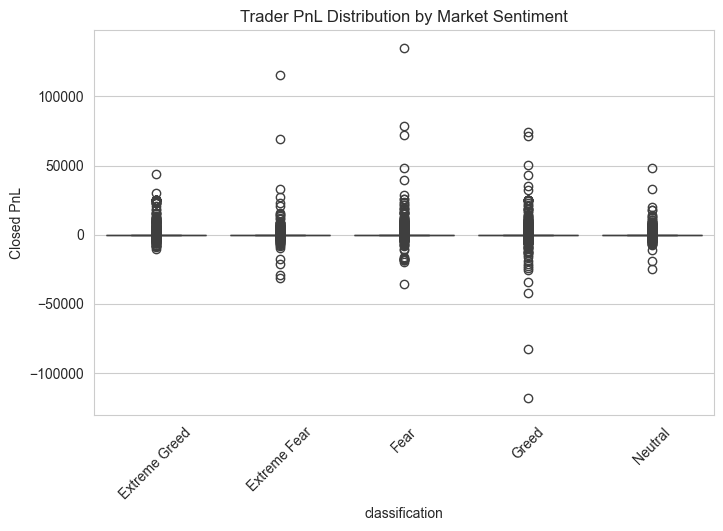

In [14]:
# Pnl vs Sentiment
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Closed PnL', data=merged)
plt.title("Trader PnL Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.savefig("pnl_vs_sentiment.png", bbox_inches='tight')
plt.show()

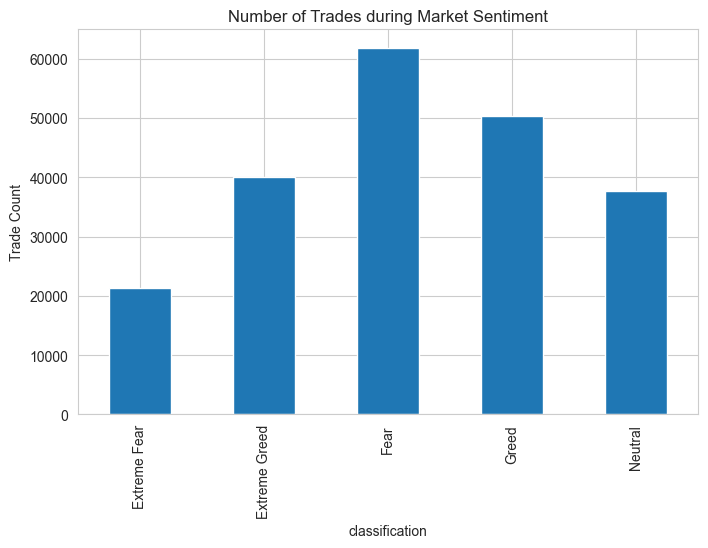

In [15]:
# Trade behavior vs sentiment
trade_freq = merged.groupby('classification').size()

plt.figure(figsize=(8,5))
trade_freq.plot(kind='bar')
plt.title("Number of Trades during Market Sentiment")
plt.ylabel("Trade Count")
plt.savefig("trade_frequency.png", bbox_inches='tight')
plt.show()

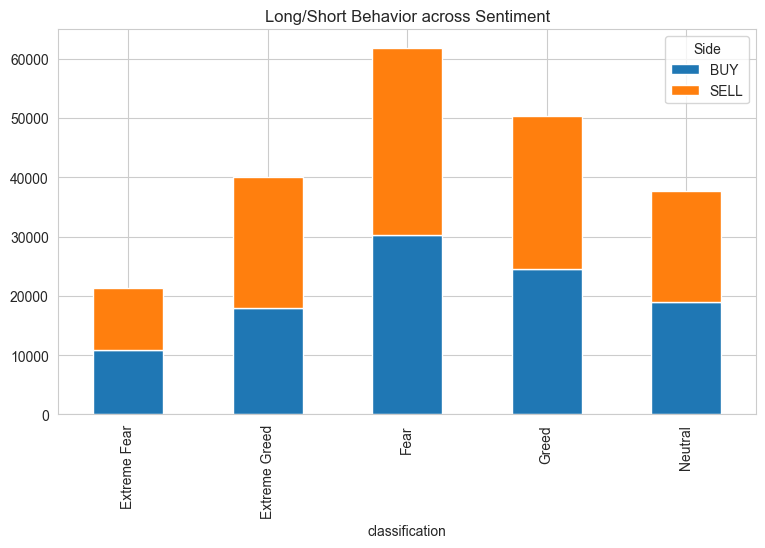

In [16]:
# LOng and short bias
side_sentiment = pd.crosstab(merged['classification'], merged['Side'])

side_sentiment.plot(kind='bar', stacked=True, figsize=(9,5))
plt.title("Long/Short Behavior across Sentiment")
plt.savefig("long_short_behavior.png", bbox_inches='tight')
plt.show()

In [17]:
# find consistent winner and losers
account_pnl = merged.groupby('Account')['Closed PnL'].sum()

winners = account_pnl[account_pnl > 0]
losers = account_pnl[account_pnl <= 0]

print("Winning traders:", len(winners))
print("Losing traders:", len(losers))

Winning traders: 29
Losing traders: 3


In [18]:
# frequent and infrequent traders
trade_counts = merged['Account'].value_counts()
high_freq = trade_counts[trade_counts > trade_counts.median()]
low_freq = trade_counts[trade_counts <= trade_counts.median()]

print("High frequency traders:", len(high_freq))
print("Low frequency traders:", len(low_freq))

High frequency traders: 16
Low frequency traders: 16


Key Findings:

1. Traders perform worse during Greed periods due to overtrading and larger loss outliers.

2. During Fear periods, trading frequency decreases and PnL distribution becomes more stable.

3. BUY positions dominate during Greed sentiment indicating emotional trading behavior.

Strategy Ideas:

1. Reduce trade frequency and position size during Extreme Greed sentiment.

2. During Fear sentiment, selective trades with tighter risk management perform better.